In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scalecast.Forecaster import Forecaster

In [3]:
df = pd.read_csv('D:\\PythonProjects\\DataSets\\AirPassengers.csv', parse_dates = ['Month'])

In [4]:
df = df.sort_values(['Month'])

In [5]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
f = Forecaster(
    y=df['Passengers'],  #df.iloc[:, 0] ,   #passengers column 0th col
    current_dates=df['Month']
)

In [7]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

<AxesSubplot:xlabel='Date', ylabel='Values'>

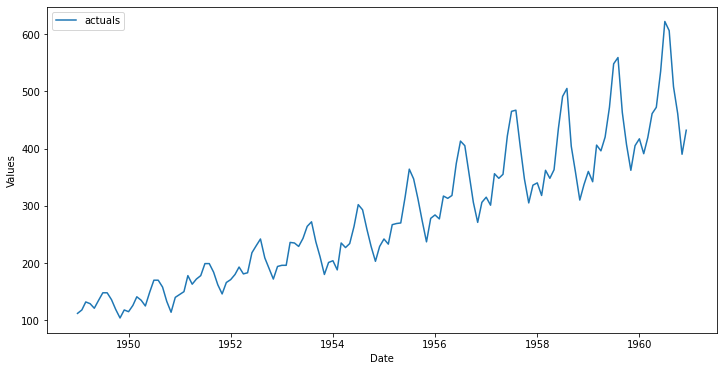

In [8]:
f.plot()

In [9]:
f.generate_future_dates(12) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set

In [10]:
f.set_estimator('arima')

#### Simple Approach (using ARIMA - nonSeasonal)

In [11]:
f.manual_forecast(call_me='arima_1')
#f.manual_forecast(dynamic_testing=12)

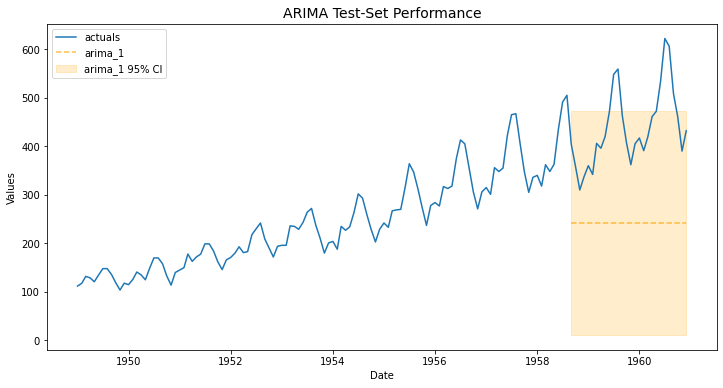

In [12]:
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

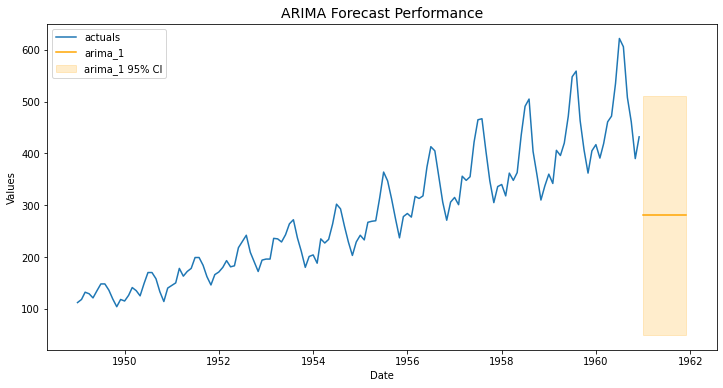

In [13]:
f.plot(ci=True)

#f.plot(ci=True, models=['arima'],order_by='LevelTestSetMAPE')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

#### ARIMA - Iterative Approach

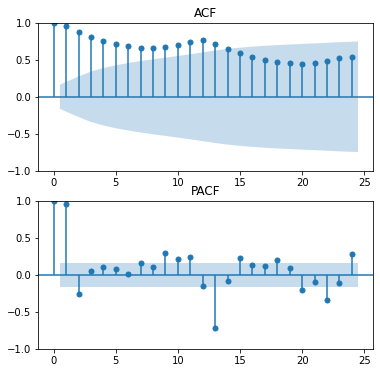

In [14]:
figs, axs = plt.subplots(2, 1,figsize=(6,6))
f.plot_acf(ax=axs[0],title='ACF',lags=24)
f.plot_pacf(ax=axs[1],title='PACF',lags=24)
plt.show()

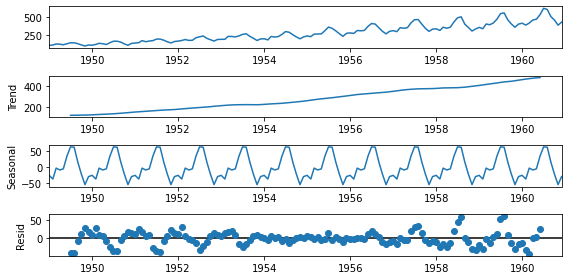

In [15]:
plt.rc("figure",figsize=(8,4))
f.seasonal_decompose().plot()
plt.show()

##### ADF Test (Augmented Dickey-Fuller Test)

It calculates the p-value and compares it with a threshold value of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/



In [16]:
list = []
list = f.adf_test(full_res=True)

# stat, pval, _, _, _, _ = f.adf_test(full_res=True)
# print(stat)
# print(pval)

In [17]:
list

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
stat = list[0]
pval = list[1]

print(stat)
print(pval)

0.8153688792060463
0.991880243437641


In [19]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima_2')

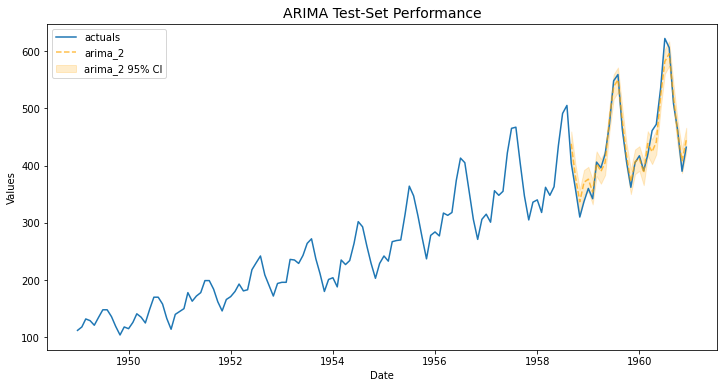

In [20]:
f.plot_test_set(ci=True,models='arima_2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

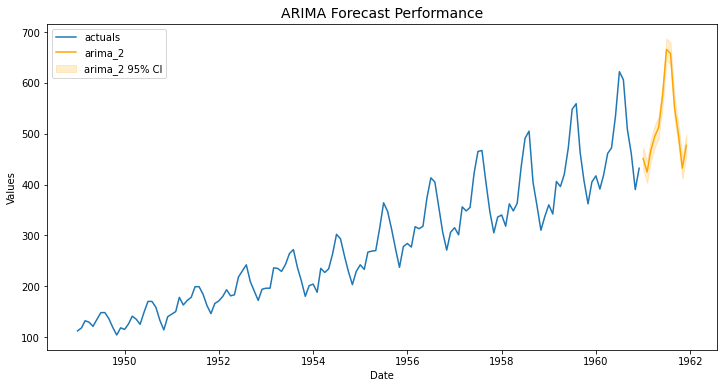

In [21]:
f.plot(ci=True,models='arima_2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [22]:
# summary stats
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.927
Date:                          Thu, 16 Mar 2023   AIC                           1015.854
Time:                                  16:11:37   BIC                           1033.105
Sample:                                       0   HQIC                          1022.863
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0762      0.274     -0.278      0.781      -0.614       0.461
ma.L1         -0.3541      0.250     -1.417      0.156      -0.844       0.136
ar.S.L12       0.6668      0.155      4.303      0.000       0.363       0.970
ar.S.L24       0.3317      0.099      3.362      0.001       0.138       0.525
ma.S.L12      -0.9738      1.184     -0.823      0.411      -3.293       1.346
sigma2       110.6889    109.320      1.013      0.311    -103.575     324.953
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.84
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               2.77   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Auto Arima Approach

###### Install pmdarima    -->  pip install pmdarima   

Pyramid Auto-ARIMA

    The ‘auto_arima’ function from the ‘pmdarima’ library helps us to identify the most optimal 
    parameters for an ARIMA model and returns a fitted ARIMA model

#### Some details about ARIMA 
    Model Types
        ARIMA:Non-seasonal Autoregressive Integrated Moving Averages
        SARIMA:Seasonal ARIMA
        SARIMAX:Seasonal ARIMA with exogenous variables

    Exogenous Variables
        An exogenous variable is one that exists outside of the model. 
        Factors outside of the model (e.g. economic model) determine the value of exogenous vars. 
        Factors within the economic model don't affect exogenous variables, 
            i.e. they are independent variables. 
            Because exogenous variables exist outside of the economic model, the model cannot 
            predict their value.
        Example:
        - External factors like crop-eating pests and the weather (would be exogenous vars) 
            This is because other variables in the model can not affect these variables. 
            They can cause more or fewer crops to grow, but the crops can't affect them in return

#### Interpreting ARIMA model results - AIC

- AIC: Akaike Information Critera 
- BIC: Bayesian Information Criterion 
- HQIC: Hannan-Quinn Information Criterion
    
    AIC
    - AIC is a good measure for testing the goodness of how fit the model is mathematically
    - IC scores measure the amount of information lost by trg and generalizing the ARIMA model
    - AIC must be as low as possible
    - To reduce AIC, try changing the p, q, and d values
    
 - Other Information:
    - AIC, BIC, and HQIC rely significantly on the learned likelihood of the data. 
    - By changing “d” (among 0, 1, and 2), we effectively change the data distribution and, 
      thus, the likelihood computation. 
    - It would not be a suitable method of determining what value of “d” we should use. So, the 
      different AICs we obtained by changing “d” are not directly comparable. 
    - However, Information Criteria scores are excellent for determining the optimal values of “p” 
      and “q.”
    
    


In [23]:
from scalecast.auxmodels import auto_arima

In [24]:
auto_arima(
    f,
    m=12,
    trace=True,
    stepwise=True,
    call_me='arima_3',
)
# auto_arima(
#     f,
#     start_P=1,
#     start_q=1,
#     max_p=6,
#     max_q=6,
#     m=12,
#     seasonal=True,
#     max_P=2, 
#     max_D=2,
#     max_Q=2,
#     max_d=2,
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True,
#     stepwise=True,
#     information_criterion="aic",
#     alpha=0.05,
#     scoring='mse',
#     call_me='arima_3',
# )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=766.298, Time=1.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=765.723, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=764.756, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=765.328, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=764.138, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=764.944, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=766.619, Time=0.35 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=765.206, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=762.550, Time=0.19 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=765.329, Time=0.41 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=765.510, Time=0.44 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=767.126, Time=0.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=764.631, Time=0.06 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=766.465, Time=0.14 sec
 ARIMA(1,1,2)(0,1,0)[12]         

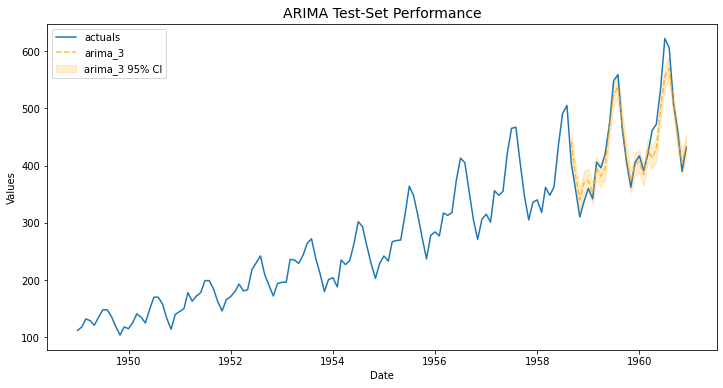

In [25]:
f.plot_test_set(ci=True,models='arima_3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

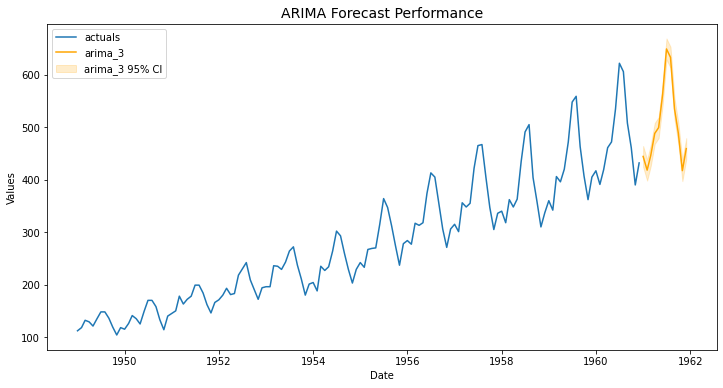

In [26]:
f.plot(ci=True,models='arima_3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [27]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  144
Model:             ARIMA(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -508.197
Date:                           Thu, 16 Mar 2023   AIC                           1022.393
Time:                                   16:12:11   BIC                           1031.019
Sample:                                        0   HQIC                          1025.898
                                           - 144                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3029      0.355     -0.853      0.393      -0.999       0.393
ma.L1         -0.0052      0.336     -0.016      0.988      -0.663       0.652
sigma2       137.0156     14.653      9.350      0.000     108.295     165.736
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.71
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Grid Search Approach 

#### Grid Search
- Grid searching is a method to find the best possible combination of hyper-parameters at which the model achieves the highest accuracy. 
- Before applying Grid Searching on any algorithm, Data is used to divided into training and validation set, a validation set is used to validate the models.


- Grid Searching can be applied to any hyperparameters algorithm whose performance can be improved by tuning hyperparameter. 
- Example, grid searching can be applied 
    - on K-Nearest Neighbors by validating its performance on a set of values of K in it. 
    - Same thing with Logistic Regression by using a set of values of learning rate to find the best learning rate at which Logistic Regression achieves the best accuracy

In [28]:
f.set_validation_length(12)

In [29]:
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

In [30]:
#Ingests a grid to tune the estimator
f.ingest_grid(grid) #Ingestion: Taking medicine into the body by mouth

##### Tune
- f.tune( ) --> Tunes the  estimator using an ingested grid
- params that can be passed as args to manual_forecast() are tuned with this process
    - dynamic_tuning (bool or int) dynamically/recursively test the forecast during 
      the tuning process (meaning AR terms will be propagated with predicted values). 
    - If True, evaluates recursively over the entire out-of-sample slice of data. 
    - If int, window evaluates over that many steps (2 for 2-step recursive testing etc)
    - Setting this to False or 1 means faster performance, but gives a less-good indication of how  
      well the forecast will perform 

In [31]:
f.tune(True) #default false

In [32]:
#automatically forecasts with the best parameters indicated from the tuning process.
f.auto_forecast(call_me='arima_4') 

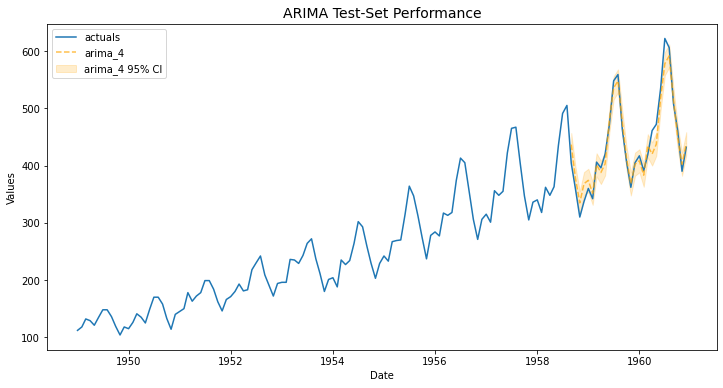

In [33]:
f.plot_test_set(ci=True,models='arima_4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

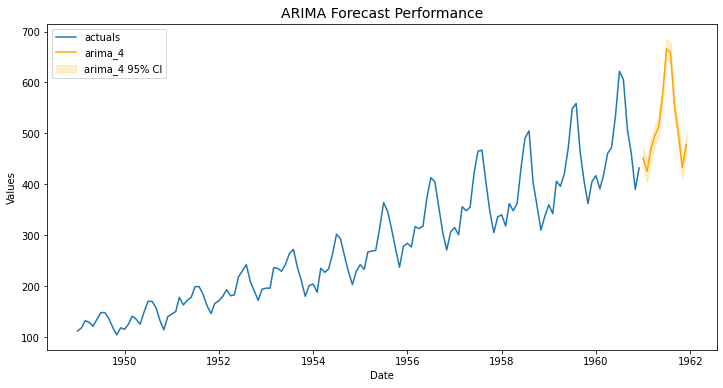

In [34]:
f.plot(ci=True,models='arima_4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [35]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -501.957
Date:                          Thu, 16 Mar 2023   AIC                           1013.915
Time:                                  16:12:59   BIC                           1028.291
Sample:                                       0   HQIC                          1019.756
                                          - 144                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4241      0.068     -6.200      0.000      -0.558      -0.290
ar.S.L12       0.6681      0.146      4.575      0.000       0.382       0.954
ar.S.L24       0.3309      0.097      3.420      0.001       0.141       0.521
ma.S.L12      -0.9794      1.433     -0.684      0.494      -3.787       1.829
sigma2       110.2355    137.216      0.803      0.422    -158.702     379.173
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.60
Prob(Q):                              0.91   Prob(JB):                         0.02
Heteroskedasticity (H):               2.80   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Exporting Results

#### MAPE
    The mean absolute percentage error (MAPE) is the mean or average of the absolute percentage errors of forecasts. 
    Error is defined as actual or observed value minus the forecasted value. 
    Percentage errors are summed without regard to sign to compute MAPE
    
- Range
    - A MAPE less than 5% --> forecast is acceptably accurate 
    - A MAPE greater than 10% but less than 25% --> low, but acceptable accuracy 
    - MAPE greater than 25% very low accuracy (forecast is not acceptable)
    

In [36]:
pd.options.display.max_colwidth = 100

#f.export( ) --> exports dataframes,  write to excel (with each dataframe on a separate sheet)
#will return either a dictionary with dataframes as values (df str arguments as keys)
#or a single dataframe if only one df is specified.
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [37]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima_4,"{'order': (0, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044540,0.036376
1,arima_2,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.044442,0.037198
2,arima_3,"{'order': (1, 1, 1), 'seasonal_order': (0, 1, 0, 12), 'trend': None}",0.046260,0.045857
3,arima_1,{},0.442457,0.430066
